In [3]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob

In [1]:
import requests

In [4]:
df_lst = []
for file in glob.glob('./CSV_tau_files/*'):
    df = pd.read_csv(file, index_col = 0)
    df_lst.append(df)
all_targets = pd.concat(df_lst).reset_index(drop=True)

In [6]:
all_targets[all_targets['kept?']==False]

,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per
126,4918918,50001,False,Single,24.841369,19.518399,36.944702,18.807868,19.363895,29.571982,19.518399,NaN
211,413248763,50001,False,Single,19.348074,15.460740,29.622984,11.650805,15.460740,25.510727,14.495112,NaN
244,271971130,50001,False,Single,21.263700,19.883093,19.883093,19.681296,19.393793,22.452306,24.908013,NaN
309,188589164,50001,False,Single,18.156472,19.420323,19.420323,11.270886,13.308731,26.404815,20.377603,NaN
353,388076422,500001,False,Periodic,15.378427,15.141412,19.946000,14.280681,16.905388,15.797025,14.485799,10.855667
361,285048486,500001,False,Periodic,13.826052,13.512001,17.796518,12.679700,13.218081,13.805922,16.839561,8.616528
368,231702397,500001,False,Periodic,21.731254,19.939271,8.292335,18.313004,21.565538,31.143047,42.979019,8.094581
379,212957629,500001,False,Periodic,16.543870,15.305979,13.105173,13.621985,15.443599,18.512371,23.411729,15.168359
383,420112589,500001,False,Periodic,22.011323,17.118662,16.722437,11.511701,11.778085,21.205387,17.514887,53.335441
390,95057860,500001,False,Periodic,15.128541,14.515638,15.313392,13.717883,18.025847,23.402067,8.542424,11.769634


In [52]:
len(np.unique(all_targets[all_targets['TICID'].isin(bad_ticids)].reset_index(drop=True)['TICID']))

19

In [9]:
len(np.unique(all_targets['TICID']))

94

In [15]:
from collections import deque

def read_last_n_lines(file_path, n=10):
    """
    Reads the last 'n' lines of a file without loading the entire file into memory.

    Args:
        file_path (str): The path to the text file.
        n (int): The number of last lines to read. Defaults to 10.

    Returns:
        list: A list containing the last 'n' lines of the file.
    """
    try:
        with open(file_path, 'r', encoding='utf-8') as f:
            # Create a deque with a maximum length of 'n'
            # As lines are read, the deque automatically keeps only the last 'n' lines
            last_lines = deque(f, maxlen=n)
        return list(last_lines)
    except FileNotFoundError:
        print(f"Error: The file '{file_path}' was not found.")
        return []
    except Exception as e:
        print(f"An error occurred: {e}")
        return []

# Example usage:
files = glob.glob('./SLURM_output/*') # Replace with your file name
num_lines_to_read = 1

file_lst = []

for file_name in files:
    last_ten_lines = read_last_n_lines(file_name, num_lines_to_read)

    if last_ten_lines:
        print(f"Last {num_lines_to_read} lines of '{file_name}':")
        for line in last_ten_lines:
            if line.strip()[-21:] == 'DUE TO TIME LIMIT ***' or line.strip()[-21:]=='have been OOM Killed.':
                print(file_name)
                file_lst.append(file_name)


Last 1 lines of './SLURM_output/test_search_w_plots8966.txt':
Last 1 lines of './SLURM_output/test_search_w_plots8967.txt':
Last 1 lines of './SLURM_output/test_search_w_plots8968.txt':
Last 1 lines of './SLURM_output/test_search_w_plots8976.txt':
Last 1 lines of './SLURM_output/test_search_w_plots8969.txt':
Last 1 lines of './SLURM_output/test_search_w_plots8970.txt':
Last 1 lines of './SLURM_output/test_search_w_plots8972.txt':
Last 1 lines of './SLURM_output/test_search_w_plots8979.txt':
Last 1 lines of './SLURM_output/test_search_w_plots8971.txt':
Last 1 lines of './SLURM_output/test_search_w_plots8973.txt':
./SLURM_output/test_search_w_plots8973.txt
Last 1 lines of './SLURM_output/test_search_w_plots8981.txt':
./SLURM_output/test_search_w_plots8981.txt
Last 1 lines of './SLURM_output/test_search_w_plots8975.txt':
Last 1 lines of './SLURM_output/test_search_w_plots8974.txt':
Last 1 lines of './SLURM_output/test_search_w_plots8986.txt':
Last 1 lines of './SLURM_output/test_search_w_

In [16]:
len(file_lst)
ticid_nums = []
for file in file_lst:
    line_count = 0
    with open(file, 'r') as f:
        for line in f:
            line_count += 1
#             print(line_count)

            if line_count<7:
                continue
            elif line_count ==7:
                print(line.strip())
                ticid_nums.append(line.strip()) # Process or print the line
            else:
                break

153065527
181804752
178709444
212957629
235683377
233602827
235678745
231702397
239332587
260708537
259168516
296739893
243185500
343628284
260004324
307210830
377293776
388076422
396562848
419411415
420112589
441738827
422756130
95057860
55650590


In [17]:
bad_ticids = np.array(ticid_nums, dtype = np.int64)

In [18]:
len(np.unique(all_targets[all_targets['TICID'].isin(bad_ticids)].reset_index(drop=True)['TICID']))

19

In [19]:
bad_singles = [29960110, 54962195, 98796344, 188589164, 259377017, 271169413, 277634430,
              289164482, 296739893, 299798795, 377293776, 388076422, 396562848, 413248763,
              422756130, 467179528]

In [20]:
len(bad_ticids)

25

In [21]:
params = ['t0', 'rp', 'cosi', 'a', 'per']

In [22]:
all_targets.apply(lambda x: np.nanmax([x['t0'], x['rp'], x['cosi'], x['a'], x['per']]), axis = 1)



0       35.464040
1      124.749440
2       45.018221
3       47.012829
4       36.251205
          ...    
387     47.074734
388     29.050962
389     49.970132
390     23.402067
391     17.564302
Length: 392, dtype: float64

In [23]:
all_targets['new_last_mean'] = all_targets.apply(lambda x: np.nanmean([x['t0'], x['rp'], x['cosi'], x['a'], x['per']]), axis = 1)

all_targets['new_last_med'] = all_targets.apply(lambda x: np.nanmedian([x['t0'], x['rp'], x['cosi'], x['a'], x['per']]), axis = 1)


In [24]:
all_targets['best_tau'] = all_targets.apply(lambda x: ['t0', 'rp', 'cosi', 'a', 'per'][np.nanargmax([x['t0'], x['rp'], x['cosi'], x['a'], x['per']])], axis = 1)

all_targets['best_tau_val'] = all_targets.apply(lambda x: np.nanmax([x['t0'], x['rp'], x['cosi'], x['a'], x['per']]), axis = 1)

all_targets

,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per,new_last_mean,new_last_med,best_tau,best_tau_val
0,28900646,4001,True,Single,29.922689,25.577807,35.464040,25.577807,20.739814,20.779144,47.052639,NaN,25.640201,23.178475,t0,35.464040
1,285048486,5501,True,Periodic,51.762020,37.265830,46.012020,23.041637,28.519640,20.164735,68.084646,124.749440,48.497494,28.519640,per,124.749440
2,155867025,5501,True,Periodic,32.257810,29.098056,45.018221,20.698282,22.769161,21.043687,48.590559,35.426952,28.991261,22.769161,t0,45.018221
3,353475866,4501,True,Single,32.109466,24.050233,47.012829,24.050233,20.596899,20.923497,47.963873,NaN,28.145864,22.486865,t0,47.012829
4,144700903,8001,True,Single,39.073785,32.930887,36.251205,32.930887,20.432312,22.890729,82.863789,NaN,28.126283,27.910808,t0,36.251205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,420112589,5501,True,Single,34.371879,27.265621,47.074734,20.802650,20.778484,27.265621,55.937905,NaN,28.980372,24.034136,t0,47.074734
388,420112589,10001,True,Single,32.591631,27.594431,27.594431,26.465219,29.050962,20.239934,59.607608,NaN,25.837637,27.029825,cosi,29.050962
389,420112589,45001,True,Single,33.497979,25.262488,49.970132,22.121377,25.262488,20.046024,50.089874,NaN,29.350005,23.691933,t0,49.970132
390,95057860,500001,False,Periodic,15.128541,14.515638,15.313392,13.717883,18.025847,23.402067,8.542424,11.769634,16.445765,15.313392,a,23.402067


In [25]:
all_targets['worst_tau'] = all_targets.apply(lambda x: ['t0', 'rp', 'cosi', 'a', 'per'][np.nanargmin([x['t0'], x['rp'], x['cosi'], x['a'], x['per']])], axis = 1)

all_targets['worst_tau_val'] = all_targets.apply(lambda x: np.nanmin([x['t0'], x['rp'], x['cosi'], x['a'], x['per']]), axis = 1)

all_targets

,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per,new_last_mean,new_last_med,best_tau,best_tau_val,worst_tau,worst_tau_val
0,28900646,4001,True,Single,29.922689,25.577807,35.464040,25.577807,20.739814,20.779144,47.052639,NaN,25.640201,23.178475,t0,35.464040,cosi,20.739814
1,285048486,5501,True,Periodic,51.762020,37.265830,46.012020,23.041637,28.519640,20.164735,68.084646,124.749440,48.497494,28.519640,per,124.749440,a,20.164735
2,155867025,5501,True,Periodic,32.257810,29.098056,45.018221,20.698282,22.769161,21.043687,48.590559,35.426952,28.991261,22.769161,t0,45.018221,rp,20.698282
3,353475866,4501,True,Single,32.109466,24.050233,47.012829,24.050233,20.596899,20.923497,47.963873,NaN,28.145864,22.486865,t0,47.012829,cosi,20.596899
4,144700903,8001,True,Single,39.073785,32.930887,36.251205,32.930887,20.432312,22.890729,82.863789,NaN,28.126283,27.910808,t0,36.251205,cosi,20.432312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,420112589,5501,True,Single,34.371879,27.265621,47.074734,20.802650,20.778484,27.265621,55.937905,NaN,28.980372,24.034136,t0,47.074734,cosi,20.778484
388,420112589,10001,True,Single,32.591631,27.594431,27.594431,26.465219,29.050962,20.239934,59.607608,NaN,25.837637,27.029825,cosi,29.050962,a,20.239934
389,420112589,45001,True,Single,33.497979,25.262488,49.970132,22.121377,25.262488,20.046024,50.089874,NaN,29.350005,23.691933,t0,49.970132,a,20.046024
390,95057860,500001,False,Periodic,15.128541,14.515638,15.313392,13.717883,18.025847,23.402067,8.542424,11.769634,16.445765,15.313392,a,23.402067,per,11.769634


In [144]:
bad_singles_df = all_targets[(all_targets['P/S']=='Single') & (all_targets['TICID'].isin(bad_singles))].sort_values(['TICID']).reset_index(drop=True)


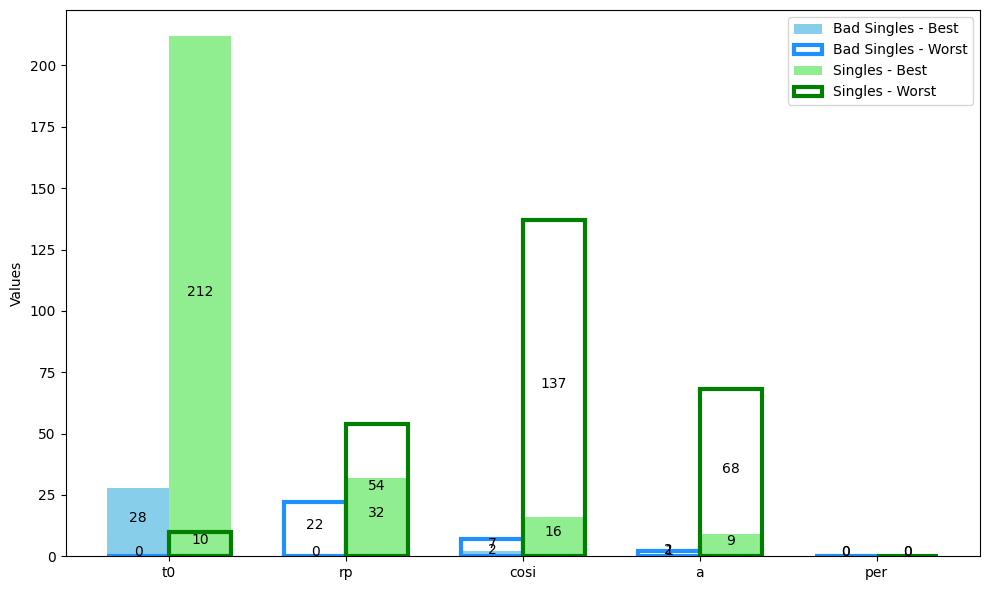

In [106]:
labels = params
bad_singles_dct = {'Best': [len(bad_singles_df[(bad_singles_df['best_tau']==x)]) for x in params],
           'Worst': [len(bad_singles_df[(bad_singles_df['worst_tau']==x)]) for x in params]
                    }
singles_dct = {'Best': [len(singles[(singles['best_tau']==x) ]) for x in params],
           'Worst': [len(singles[(singles['worst_tau']==x) ]) for x in params]
                    }

x = np.arange(len(labels))  # x locations for primary ticks
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Group 1
p = ax.bar(x - width/2, bad_singles_dct['Best'], width, label='Bad Singles - Best', color='skyblue')
q = ax.bar(x - width/2, bad_singles_dct['Worst'], width,  label='Bad Singles - Worst', edgecolor='dodgerblue', fill=None, lw = 3)
ax.bar_label(p, label_type='center',padding=3)
ax.bar_label(q, label_type='center',padding=3)

# Plot Group 2
r = ax.bar(x + width/2, singles_dct['Best'], width, label='Singles - Best', color='lightgreen')
s = ax.bar(x + width/2, singles_dct['Worst'], width, label='Singles - Worst', edgecolor='green', fill = None, lw = 3)
ax.bar_label(r, label_type='center',padding=3)
ax.bar_label(s, label_type='center',padding=3)

# ax.set_yscale('log')
# Customize chart
ax.set_ylabel('Values')
# ax.set_title('Stacked Grouped Bar Chart')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

In [145]:
# bad_singles_indxs = np.full(len(bad_singles_df), False)
# bad_singles_indxs[np.array([2, 5, 9, 11, 12, 13, 14, 15, 19, 21,22,24, 27, 29,30,37, 38, 40, 41,
# 57, 70, 61, 59, 64, 63, 67, 73, 72, 76, 82, 81])] = True

In [146]:
# bad_singles_df = bad_singles_df[bad_singles_indxs]
# bad_singles_df = bad_singles_df.reset_index(drop=True)

In [154]:
# bad_singles_df['low_mean'] = bad_singles_df.apply(lambda x: np.nanmean([x['rp'], x['cosi'], x['a']]), axis = 1)
# bad_singles_df['low_std'] = bad_singles_df.apply(lambda x: np.nanmax([x['rp'], x['cosi'], x['a']])), axis = 1)
bad_singles_df = bad_singles_df.sort_values(['t0']).reset_index(drop=True)




,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per,new_last_mean,new_last_med,best_tau,best_tau_val,worst_tau,worst_tau_val
1,377293776,143001,True,Single,32.297079,26.302952,25.643905,20.057839,26.302952,26.809318,62.671379,NaN,24.703503,25.973428,a,26.809318,rp,20.057839


In [158]:
len(singles)-len(bad_singles_df)

238

In [172]:
goodish_singles = singles[ ~singles['a'].isin(list(bad_singles_df['a']))].reset_index(drop=True)



,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per,new_last_mean,new_last_med,best_tau,best_tau_val,worst_tau,worst_tau_val


In [182]:
goodish_singles[((goodish_singles['t0']<=goodish_singles['new_last_mean']) & (goodish_singles['rp']>goodish_singles['new_last_mean']) & (goodish_singles['cosi']>goodish_singles['new_last_mean']) & (goodish_singles['a']>goodish_singles['new_last_mean'])) ]#.reset_index(drop=True)


,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per,new_last_mean,new_last_med,best_tau,best_tau_val,worst_tau,worst_tau_val
218,388076422,12501,True,Single,35.903958,37.792491,20.515545,42.532416,41.319849,37.792491,37.35949,NaN,35.540075,39.55617,rp,42.532416,t0,20.515545


In [ ]:
goodish_singles

In [143]:
# bad_singles_df.apply(lambda x: ((max([x['t0'], x['norm']]) - x['low_mean'])/x['low_std']), axis = 1)
bad_singles_df.sort_values(['t0'])
# bad_singles_df 

,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per,new_last_mean,new_last_med,best_tau,best_tau_val,worst_tau,worst_tau_val,low_mean,low_std
0,299798795,50501,True,Single,20.898644,20.809417,20.982994,20.176252,22.254605,20.269952,20.809417,NaN,20.920951,20.626473,cosi,22.254605,rp,20.176252,20.900270,22.254605
1,377293776,143001,True,Single,32.297079,26.302952,25.643905,20.057839,26.302952,26.809318,62.671379,NaN,24.703503,25.973428,a,26.809318,rp,20.057839,24.390036,26.809318
2,396562848,51001,True,Single,28.457948,26.681701,33.550924,20.087359,22.231832,26.681701,39.737925,NaN,25.637954,24.456767,t0,33.550924,rp,20.087359,23.000297,26.681701
3,271169413,68501,True,Single,33.049978,25.701391,35.332007,20.759810,25.701391,20.007063,63.449617,NaN,25.450068,23.230601,t0,35.332007,a,20.007063,22.156088,25.701391
4,299798795,9001,True,Single,31.237980,23.824611,39.766526,23.824611,20.510361,20.580641,51.507763,NaN,26.170535,22.202626,t0,39.766526,cosi,20.510361,21.638538,23.824611
5,98796344,51001,True,Single,30.277343,23.874789,39.933937,20.053607,23.430597,23.874789,44.093783,NaN,26.823233,23.652693,t0,39.933937,rp,20.053607,22.452998,23.874789
6,296739893,38001,True,Single,30.902080,26.139939,41.585621,20.376271,20.603934,26.139939,45.804632,NaN,27.176442,23.371937,t0,41.585621,rp,20.376271,22.373382,26.139939
7,259377017,47501,True,Single,31.069883,32.814241,44.052244,21.571445,20.073527,36.837957,32.814241,NaN,30.633794,29.204701,t0,44.052244,cosi,20.073527,26.160977,36.837957
8,289164482,101001,True,Single,35.290629,43.394928,44.885936,20.045083,45.965971,22.161229,43.394928,NaN,33.264555,33.523583,cosi,45.965971,rp,20.045083,29.390761,45.965971
9,396562848,48001,True,Single,30.250701,27.760783,46.760097,20.138022,20.359660,27.760783,36.234942,NaN,28.754640,24.060222,t0,46.760097,rp,20.138022,22.752822,27.760783


In [122]:
bad_singles_df[['t0', 'low_mean', 'low_std', 'norm']]

,t0,low_mean,low_std,norm
0,69.187950,33.968363,14.649890,18.492356
1,64.610081,25.289910,6.551093,44.634343
2,39.933937,22.452998,1.706289,44.093783
3,51.530077,31.009073,12.849049,43.345216
4,69.784224,24.709913,6.137333,72.733260
5,44.052244,26.160977,7.574491,32.814241
6,46.963726,23.497154,3.567532,37.944299
7,52.647108,24.451850,3.198857,36.649204
8,83.645008,26.835837,7.889598,47.875222
9,184.377995,33.867775,13.269636,121.957442


In [36]:
all_targets[(all_targets['Nsteps'] > 100001) & (all_targets['Nsteps'] < 400001)].sort_values(['TICID']).reset_index(drop=True)#[['TICID', 't0']]

,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per,new_last_mean,new_last_med,best_tau,best_tau_val,worst_tau,worst_tau_val
0,35009898,288501,True,Periodic,34.325572,31.308481,39.921349,21.390217,22.695613,20.100609,41.597088,60.248556,32.871269,22.695613,per,60.248556,a,20.100609
1,54962195,149501,True,Single,37.022831,34.523864,64.610081,20.020405,21.325461,34.523864,44.634343,NaN,35.119953,27.924663,t0,64.610081,rp,20.020405
2,77156829,165001,True,Periodic,62.116305,35.324752,20.027411,33.742209,46.165695,25.796786,36.907295,210.058433,67.158107,33.742209,per,210.058433,t0,20.027411
3,142748283,278501,True,Periodic,41.030102,44.993542,53.045793,20.005817,54.585427,36.941290,20.444139,61.158145,45.147294,53.045793,per,61.158145,rp,20.005817
4,166184428,136001,True,Periodic,89.523664,87.083536,20.024822,159.863194,125.447129,29.789588,153.297311,48.719942,76.768935,48.719942,rp,159.863194,t0,20.024822
5,188589164,368001,True,Single,37.580502,43.345216,51.530077,23.984013,20.008385,49.034821,43.345216,NaN,36.139324,36.509417,t0,51.530077,cosi,20.008385
6,193634953,232501,True,Periodic,24.857910,23.808328,34.625584,25.181392,20.003036,22.435264,21.185375,25.716808,25.592417,25.181392,t0,34.625584,cosi,20.003036
7,201177276,253001,True,Periodic,206.487093,104.498321,178.931956,30.064686,20.025381,20.252968,475.800609,513.846960,152.624390,30.064686,per,513.846960,cosi,20.025381
8,233602827,272001,True,Periodic,51.186203,27.756641,31.910490,20.806500,20.008850,23.602793,48.513596,162.274991,51.720725,23.602793,per,162.274991,cosi,20.008850
9,233602827,112001,True,Periodic,28.660190,26.114089,24.972508,22.420777,27.255671,34.531990,42.690677,20.089517,25.854093,24.972508,a,34.531990,per,20.089517


In [37]:
len(all_targets)

392

In [38]:
len(glob.glob('./saving_MCMC_plots/*'))

340

In [39]:
all_kept = all_targets[all_targets['kept?']==True].reset_index(drop=True)

In [40]:
all_kept[(all_kept['P/S']=='Periodic') & (all_kept['Nsteps']>1E5)].reset_index(drop=True)

,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per,new_last_mean,new_last_med,best_tau,best_tau_val,worst_tau,worst_tau_val
0,166184428,136001,True,Periodic,89.523664,87.083536,20.024822,159.863194,125.447129,29.789588,153.297311,48.719942,76.768935,48.719942,rp,159.863194,t0,20.024822
1,422756130,176001,True,Periodic,55.400405,36.441333,85.855145,20.027857,22.017682,41.544395,31.338271,131.619082,60.212832,41.544395,per,131.619082,rp,20.027857
2,77156829,165001,True,Periodic,62.116305,35.324752,20.027411,33.742209,46.165695,25.796786,36.907295,210.058433,67.158107,33.742209,per,210.058433,t0,20.027411
3,250111245,206001,True,Periodic,38.303890,35.362206,58.790247,20.026496,21.044945,21.504937,59.237241,49.219476,34.117220,21.504937,t0,58.790247,rp,20.026496
4,277634430,232001,True,Periodic,29.893857,23.959819,20.008569,22.396174,23.936993,23.982645,52.804409,36.234353,25.311747,23.936993,per,36.234353,t0,20.008569
5,193634953,232501,True,Periodic,24.857910,23.808328,34.625584,25.181392,20.003036,22.435264,21.185375,25.716808,25.592417,25.181392,t0,34.625584,cosi,20.003036
6,307210830,203001,True,Periodic,231.463200,35.500783,46.849876,20.023779,29.959839,31.693760,39.307807,1220.944138,269.894278,31.693760,per,1220.944138,rp,20.023779
7,422756130,211501,True,Periodic,53.582799,36.348673,39.495623,20.015516,21.330378,33.434756,39.262590,167.957930,56.446840,33.434756,per,167.957930,rp,20.015516
8,243185500,263501,True,Periodic,56.291455,30.651996,86.465827,35.428758,25.743977,25.875234,144.217134,20.017803,38.706320,25.875234,t0,86.465827,per,20.017803
9,35009898,288501,True,Periodic,34.325572,31.308481,39.921349,21.390217,22.695613,20.100609,41.597088,60.248556,32.871269,22.695613,per,60.248556,a,20.100609


10001.0
20220.367588932808


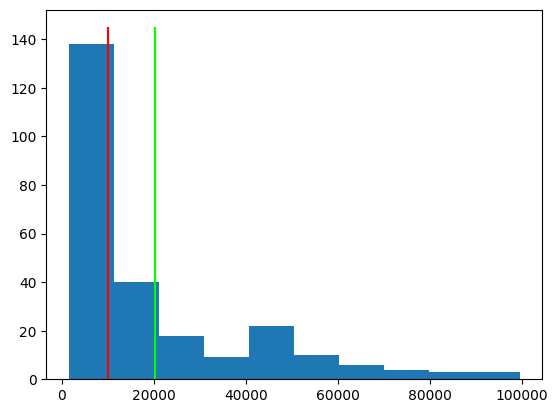

In [41]:
fig, ax = plt.subplots()
ax.hist(all_kept[(all_kept['P/S']=='Single') & (all_kept['Nsteps']<1E5)]['Nsteps'], bins=10, edgecolor=None)
m, M = ax.get_ylim()
# ax.set_yscale('log')

ax.vlines(np.median(all_kept[(all_kept['P/S']=='Single') & (all_kept['Nsteps']<1E5)]['Nsteps']), m, M, color = 'r')

ax.vlines(np.mean(all_kept[(all_kept['P/S']=='Single') & (all_kept['Nsteps']<1E5)]['Nsteps']), m, M, color = 'lime')

print(np.median(all_kept[(all_kept['P/S']=='Single') & (all_kept['Nsteps']<1E5)]['Nsteps']))
print(np.mean(all_kept[(all_kept['P/S']=='Single') & (all_kept['Nsteps']<1E5)]['Nsteps']))

In [42]:
kept_targets = all_targets[all_targets['kept?'] == True].reset_index(drop=True)
kept_targets

,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per,new_last_mean,new_last_med,best_tau,best_tau_val,worst_tau,worst_tau_val
0,28900646,4001,True,Single,29.922689,25.577807,35.464040,25.577807,20.739814,20.779144,47.052639,NaN,25.640201,23.178475,t0,35.464040,cosi,20.739814
1,285048486,5501,True,Periodic,51.762020,37.265830,46.012020,23.041637,28.519640,20.164735,68.084646,124.749440,48.497494,28.519640,per,124.749440,a,20.164735
2,155867025,5501,True,Periodic,32.257810,29.098056,45.018221,20.698282,22.769161,21.043687,48.590559,35.426952,28.991261,22.769161,t0,45.018221,rp,20.698282
3,353475866,4501,True,Single,32.109466,24.050233,47.012829,24.050233,20.596899,20.923497,47.963873,NaN,28.145864,22.486865,t0,47.012829,cosi,20.596899
4,144700903,8001,True,Single,39.073785,32.930887,36.251205,32.930887,20.432312,22.890729,82.863789,NaN,28.126283,27.910808,t0,36.251205,cosi,20.432312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376,420112589,19501,True,Single,45.760186,26.416612,26.416612,51.215476,24.712032,20.157347,106.299464,NaN,30.625367,25.564322,rp,51.215476,a,20.157347
377,420112589,17001,True,Single,28.417468,21.801477,23.799050,21.801477,21.575622,20.222576,54.688617,NaN,21.849681,21.688550,t0,23.799050,a,20.222576
378,420112589,5501,True,Single,34.371879,27.265621,47.074734,20.802650,20.778484,27.265621,55.937905,NaN,28.980372,24.034136,t0,47.074734,cosi,20.778484
379,420112589,10001,True,Single,32.591631,27.594431,27.594431,26.465219,29.050962,20.239934,59.607608,NaN,25.837637,27.029825,cosi,29.050962,a,20.239934


In [43]:
reject_targets = all_targets[all_targets['kept?'] != True].reset_index(drop=True)
reject_targets

,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per,new_last_mean,new_last_med,best_tau,best_tau_val,worst_tau,worst_tau_val
0,4918918,50001,False,Single,24.841369,19.518399,36.944702,18.807868,19.363895,29.571982,19.518399,NaN,26.172112,24.467939,t0,36.944702,rp,18.807868
1,413248763,50001,False,Single,19.348074,15.460740,29.622984,11.650805,15.460740,25.510727,14.495112,NaN,20.561314,20.485733,t0,29.622984,rp,11.650805
2,271971130,50001,False,Single,21.263700,19.883093,19.883093,19.681296,19.393793,22.452306,24.908013,NaN,20.352622,19.782194,a,22.452306,cosi,19.393793
3,188589164,50001,False,Single,18.156472,19.420323,19.420323,11.270886,13.308731,26.404815,20.377603,NaN,17.601189,16.364527,a,26.404815,rp,11.270886
4,388076422,500001,False,Periodic,15.378427,15.141412,19.946000,14.280681,16.905388,15.797025,14.485799,10.855667,15.556952,15.797025,t0,19.946000,per,10.855667
5,285048486,500001,False,Periodic,13.826052,13.512001,17.796518,12.679700,13.218081,13.805922,16.839561,8.616528,13.223350,13.218081,t0,17.796518,per,8.616528
6,231702397,500001,False,Periodic,21.731254,19.939271,8.292335,18.313004,21.565538,31.143047,42.979019,8.094581,17.481701,18.313004,a,31.143047,per,8.094581
7,212957629,500001,False,Periodic,16.543870,15.305979,13.105173,13.621985,15.443599,18.512371,23.411729,15.168359,15.170298,15.168359,a,18.512371,t0,13.105173
8,420112589,500001,False,Periodic,22.011323,17.118662,16.722437,11.511701,11.778085,21.205387,17.514887,53.335441,22.910610,16.722437,per,53.335441,rp,11.511701
9,95057860,500001,False,Periodic,15.128541,14.515638,15.313392,13.717883,18.025847,23.402067,8.542424,11.769634,16.445765,15.313392,a,23.402067,per,11.769634


In [44]:
singles

NameError: name 'singles' is not defined

In [45]:
bool_ary = np.full(len(all_kept), False)
bool_ary[np.where(all_kept['best_tau_val']-all_kept['a'] > 20)[0]]=True

In [46]:
all_kept[bool_ary].reset_index(drop=True)

,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per,new_last_mean,new_last_med,best_tau,best_tau_val,worst_tau,worst_tau_val
0,285048486,5501,True,Periodic,51.762020,37.265830,46.012020,23.041637,28.519640,20.164735,68.084646,124.749440,48.497494,28.519640,per,124.749440,a,20.164735
1,155867025,5501,True,Periodic,32.257810,29.098056,45.018221,20.698282,22.769161,21.043687,48.590559,35.426952,28.991261,22.769161,t0,45.018221,rp,20.698282
2,353475866,4501,True,Single,32.109466,24.050233,47.012829,24.050233,20.596899,20.923497,47.963873,NaN,28.145864,22.486865,t0,47.012829,cosi,20.596899
3,328513434,8501,True,Periodic,45.883179,40.902160,47.131416,20.099081,34.672904,23.581054,88.910556,60.904062,37.277703,34.672904,per,60.904062,rp,20.099081
4,144700903,7501,True,Single,43.059356,28.373430,58.201786,28.373430,21.512464,26.211919,80.997181,NaN,33.574900,27.292674,t0,58.201786,cosi,21.512464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,212957629,7501,True,Periodic,68.705905,72.606459,95.151246,50.061671,22.852096,20.861462,118.592283,104.716672,58.728629,50.061671,per,104.716672,a,20.861462
223,181804752,75501,True,Periodic,47.328381,43.222689,84.899587,20.233300,30.814192,21.961845,70.430175,55.631185,42.708022,30.814192,t0,84.899587,rp,20.233300
224,420112589,15001,True,Single,36.707262,27.190634,27.190634,43.995472,21.460460,20.804285,70.085459,NaN,28.362713,24.325547,rp,43.995472,a,20.804285
225,420112589,19501,True,Single,45.760186,26.416612,26.416612,51.215476,24.712032,20.157347,106.299464,NaN,30.625367,25.564322,rp,51.215476,a,20.157347


In [47]:
all_targets[all_targets['P/S'] == 'Single'].reset_index(drop=True)

,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per,new_last_mean,new_last_med,best_tau,best_tau_val,worst_tau,worst_tau_val
0,28900646,4001,True,Single,29.922689,25.577807,35.464040,25.577807,20.739814,20.779144,47.052639,NaN,25.640201,23.178475,t0,35.464040,cosi,20.739814
1,353475866,4501,True,Single,32.109466,24.050233,47.012829,24.050233,20.596899,20.923497,47.963873,NaN,28.145864,22.486865,t0,47.012829,cosi,20.596899
2,144700903,8001,True,Single,39.073785,32.930887,36.251205,32.930887,20.432312,22.890729,82.863789,NaN,28.126283,27.910808,t0,36.251205,cosi,20.432312
3,118327550,3501,True,Single,29.600428,25.550586,32.238867,25.550586,22.267201,22.443888,45.501597,NaN,25.625136,23.997237,t0,32.238867,cosi,22.267201
4,201186294,10001,True,Single,30.804823,26.916076,20.424257,26.916076,29.784714,20.322472,56.576597,NaN,24.361880,23.670167,cosi,29.784714,a,20.322472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,420112589,19501,True,Single,45.760186,26.416612,26.416612,51.215476,24.712032,20.157347,106.299464,NaN,30.625367,25.564322,rp,51.215476,a,20.157347
265,420112589,17001,True,Single,28.417468,21.801477,23.799050,21.801477,21.575622,20.222576,54.688617,NaN,21.849681,21.688550,t0,23.799050,a,20.222576
266,420112589,5501,True,Single,34.371879,27.265621,47.074734,20.802650,20.778484,27.265621,55.937905,NaN,28.980372,24.034136,t0,47.074734,cosi,20.778484
267,420112589,10001,True,Single,32.591631,27.594431,27.594431,26.465219,29.050962,20.239934,59.607608,NaN,25.837637,27.029825,cosi,29.050962,a,20.239934


In [48]:
singles = all_targets[all_targets['P/S'] == 'Single'].reset_index(drop=True)
periods = all_targets[all_targets['P/S'] == 'Periodic'].reset_index(drop=True)

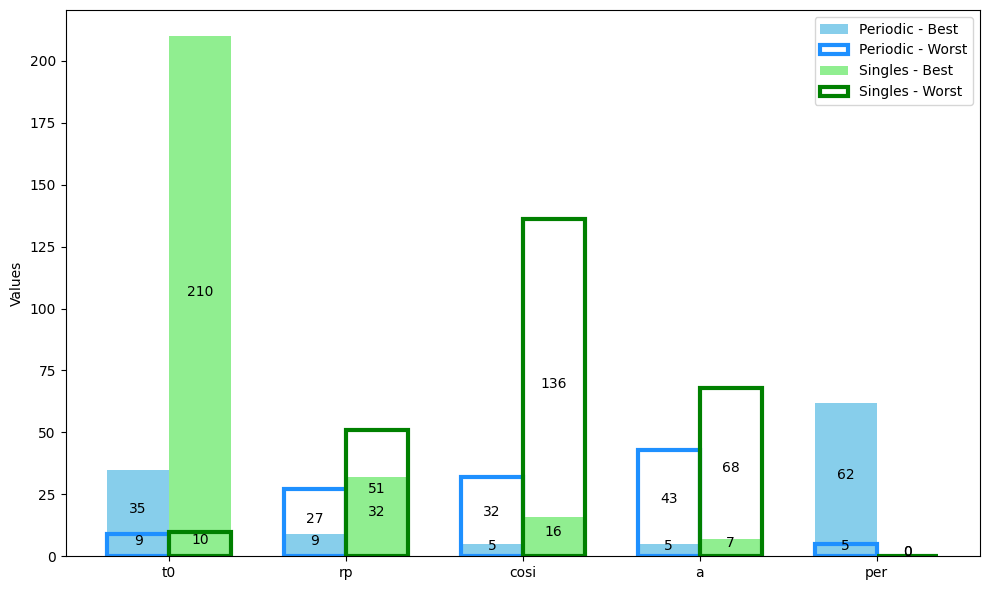

In [49]:
labels = params
periods_dct = {'Best': [len(periods[(periods['best_tau']==x) & (periods['kept?']==True)]) for x in params],
           'Worst': [len(periods[(periods['worst_tau']==x) & (periods['kept?']==True)]) for x in params]
                    }
singles_dct = {'Best': [len(singles[(singles['best_tau']==x) & (singles['kept?']==True)]) for x in params],
           'Worst': [len(singles[(singles['worst_tau']==x) & (singles['kept?']==True)]) for x in params]
                    }

x = np.arange(len(labels))  # x locations for primary ticks
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Group 1
p = ax.bar(x - width/2, periods_dct['Best'], width, label='Periodic - Best', color='skyblue')
q = ax.bar(x - width/2, periods_dct['Worst'], width,  label='Periodic - Worst', edgecolor='dodgerblue', fill=None, lw = 3)
ax.bar_label(p, label_type='center',padding=3)
ax.bar_label(q, label_type='center',padding=3)

# Plot Group 2
r = ax.bar(x + width/2, singles_dct['Best'], width, label='Singles - Best', color='lightgreen')
s = ax.bar(x + width/2, singles_dct['Worst'], width, label='Singles - Worst', edgecolor='green', fill = None, lw = 3)
ax.bar_label(r, label_type='center',padding=3)
ax.bar_label(s, label_type='center',padding=3)

# ax.set_yscale('log')
# Customize chart
ax.set_ylabel('Values')
# ax.set_title('Stacked Grouped Bar Chart')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

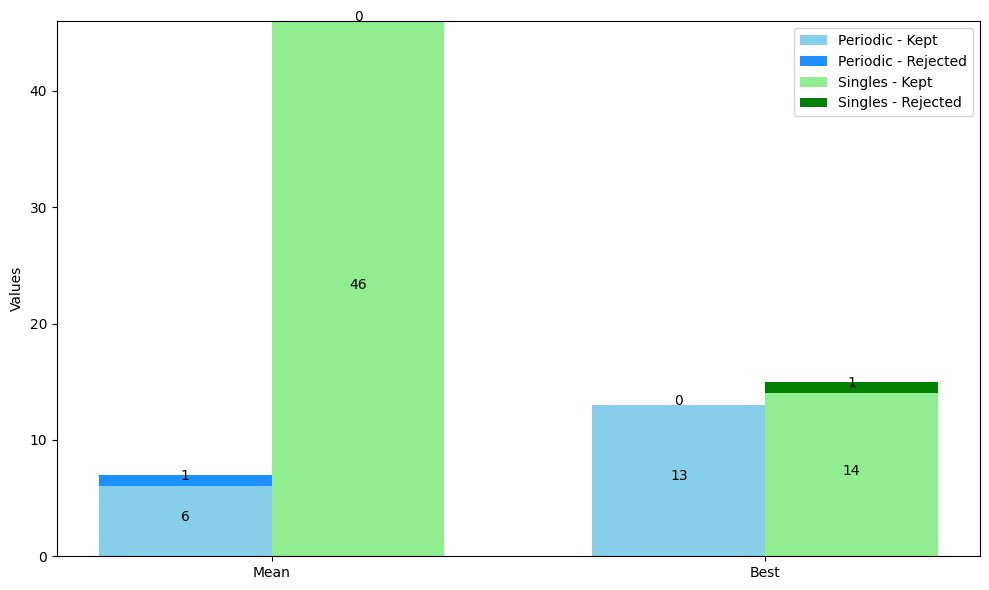

In [83]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
labels = ['Mean', 'Best']
periods_dct_m = {'Kept': [len(periods[(periods['mean_last_st']>=periods['best_tau_val']) & (periods['kept?']==True)]), len(periods[(periods['mean_last_st']<periods['med_last_st']) & (periods['kept?']==True)])],
           'Reject': [len(periods[(periods['mean_last_st']>=periods['best_tau_val']) & (periods['kept?']==False)]), len(periods[(periods['mean_last_st']<periods['med_last_st']) & (periods['kept?']==False)])]
                    }
singles_dct_m = {'Kept': [len(singles[(singles['mean_last_st']>=singles['best_tau_val']) & (singles['kept?']==True)]), len(singles[(singles['mean_last_st']<singles['med_last_st']) & (singles['kept?']==True)])],
           'Reject': [len(singles[(singles['mean_last_st']>=singles['best_tau_val']) & (singles['kept?']==False)]), len(singles[(singles['mean_last_st']<singles['med_last_st']) & (singles['kept?']==False)])]
                    }

x = np.arange(len(labels))  # x locations for primary ticks
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Group 1
p = ax.bar(x - width/2, periods_dct_m['Kept'], width, label='Periodic - Kept', color='skyblue')
q = ax.bar(x - width/2, periods_dct_m['Reject'], width, bottom=periods_dct_m['Kept'], label='Periodic - Rejected', color='dodgerblue')
ax.bar_label(p, label_type='center',padding=3)
ax.bar_label(q, label_type='center',padding=3)

# Plot Group 2
r = ax.bar(x + width/2, singles_dct_m['Kept'], width, label='Singles - Kept', color='lightgreen')
s = ax.bar(x + width/2, singles_dct_m['Reject'], width, bottom=singles_dct_m['Kept'], label='Singles - Rejected', color='green')
ax.bar_label(r, label_type='center',padding=3)
ax.bar_label(s, label_type='center',padding=3)

# ax.set_yscale('log')
# Customize chart
ax.set_ylabel('Values')
# ax.set_title('Stacked Grouped Bar Chart')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

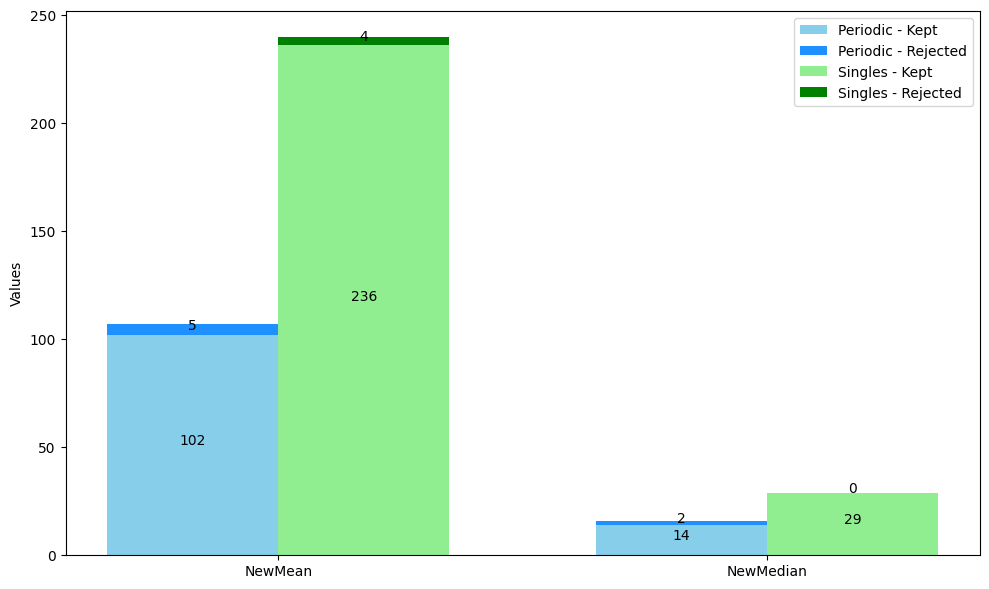

In [84]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
labels = ['NewMean', 'NewMedian']
periods_dct_m = {'Kept': [len(periods[(periods['new_last_mean']>=periods['new_last_med']) & (periods['kept?']==True)]), len(periods[(periods['new_last_mean']<periods['new_last_med']) & (periods['kept?']==True)])],
           'Reject': [len(periods[(periods['new_last_mean']>=periods['new_last_med']) & (periods['kept?']==False)]), len(periods[(periods['new_last_mean']<periods['new_last_med']) & (periods['kept?']==False)])]
                    }
singles_dct_m = {'Kept': [len(singles[(singles['new_last_mean']>=singles['new_last_med']) & (singles['kept?']==True)]), len(singles[(singles['new_last_mean']<singles['new_last_med']) & (singles['kept?']==True)])],
           'Reject': [len(singles[(singles['new_last_mean']>=singles['new_last_med']) & (singles['kept?']==False)]), len(singles[(singles['new_last_mean']<singles['new_last_med']) & (singles['kept?']==False)])]
                    }

x = np.arange(len(labels))  # x locations for primary ticks
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Group 1
p = ax.bar(x - width/2, periods_dct_m['Kept'], width, label='Periodic - Kept', color='skyblue')
q = ax.bar(x - width/2, periods_dct_m['Reject'], width, bottom=periods_dct_m['Kept'], label='Periodic - Rejected', color='dodgerblue')
ax.bar_label(p, label_type='center',padding=3)
ax.bar_label(q, label_type='center',padding=3)

# Plot Group 2
r = ax.bar(x + width/2, singles_dct_m['Kept'], width, label='Singles - Kept', color='lightgreen')
s = ax.bar(x + width/2, singles_dct_m['Reject'], width, bottom=singles_dct_m['Kept'], label='Singles - Rejected', color='green')
ax.bar_label(r, label_type='center',padding=3)
ax.bar_label(s, label_type='center',padding=3)

# ax.set_yscale('log')
# Customize chart
ax.set_ylabel('Values')
# ax.set_title('Stacked Grouped Bar Chart')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

In [85]:
singles_dct_m = {'Kept': [len(singles[(singles['mean_last_st']>=20)&(singles['t0']<20) & (singles['kept?']==True)]),len(singles[(singles['mean_last_st']<20)&(singles['t0']>=20) & (singles['kept?']==True)]), len(singles[(singles['new_last_mean']>=20) &(singles['t0']>=20) & (singles['kept?']==True)]), len(singles[(singles['new_last_mean']<20) &(singles['t0']<20) & (singles['kept?']==True)])],
           'Reject': [[len(singles[(singles['mean_last_st']>=20)&(singles['t0']<20) & (singles['kept?']==False)]),len(singles[(singles['mean_last_st']<20)&(singles['t0']>=20) & (singles['kept?']==False)]), len(singles[(singles['new_last_mean']>=20) &(singles['t0']>=20) & (singles['kept?']==False)]), len(singles[(singles['new_last_mean']<20) &(singles['t0']<20) & (singles['kept?']==False)])]]
                    }

In [53]:
periods[(periods['mean_last_st']>=20)&(periods['t0']<20) & (periods['kept?']==True)]

,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per
108,343628284,500001,True,Periodic,43.266339,39.851042,14.618341,36.765071,42.937013,47.443910,102.862803,14.970898
111,369327947,500001,True,Periodic,32.698266,22.929820,9.904679,16.021187,70.410129,29.838453,58.869656,11.145490


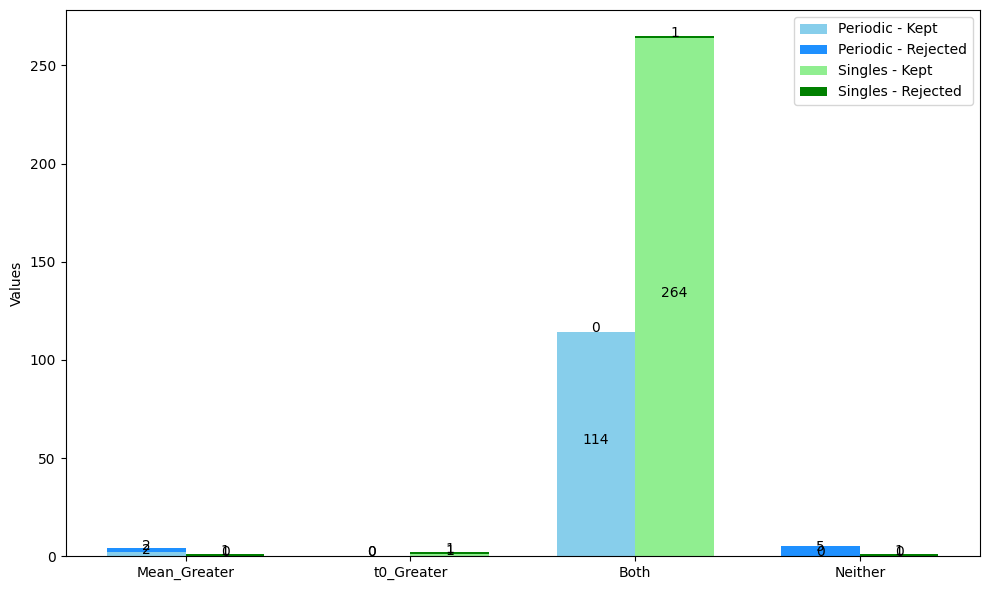

In [54]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
labels = ['Mean_Greater', 't0_Greater', 'Both', 'Neither']
periods_dct_mean_t0 = {'Kept': [len(periods[(periods['mean_last_st']>=20)&(periods['t0']<20) & (periods['kept?']==True)]),len(periods[(periods['mean_last_st']<20)&(periods['t0']>=20) & (periods['kept?']==True)]), len(periods[(periods['mean_last_st']>=20)&(periods['t0']>=20) & (periods['kept?']==True)]), len(periods[(periods['mean_last_st']<20)&(periods['t0']<20) & (periods['kept?']==True)])],
           'Reject': [len(periods[(periods['mean_last_st']>=20)&(periods['t0']<20) & (periods['kept?']==False)]),len(periods[(periods['mean_last_st']<20)&(periods['t0']>=20) & (periods['kept?']==False)]), len(periods[(periods['mean_last_st']>=20)&(periods['t0']>=20) & (periods['kept?']==False)]), len(periods[(periods['mean_last_st']<20)&(periods['t0']<20) & (periods['kept?']==False)])],
                    }
singles_dct_mean_t0 = {'Kept': [len(singles[(singles['mean_last_st']>=20)&(singles['t0']<20) & (singles['kept?']==True)]),len(singles[(singles['mean_last_st']<20)&(singles['t0']>=20) & (singles['kept?']==True)]), len(singles[(singles['mean_last_st']>=20)&(singles['t0']>=20) & (singles['kept?']==True)]), len(singles[(singles['mean_last_st']<20)&(singles['t0']<20) & (singles['kept?']==True)])],
           'Reject': [len(singles[(singles['mean_last_st']>=20)&(singles['t0']<20) & (singles['kept?']==False)]),len(singles[(singles['mean_last_st']<20)&(singles['t0']>=20) & (singles['kept?']==False)]), len(singles[(singles['mean_last_st']>=20)&(singles['t0']>=20) & (singles['kept?']==False)]), len(singles[(singles['mean_last_st']<20)&(singles['t0']<20) & (singles['kept?']==False)])],
                    }
x = np.arange(len(labels))  # x locations for primary ticks
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Group 1
p = ax.bar(x - width/2, periods_dct_mean_t0['Kept'], width, label='Periodic - Kept', color='skyblue')
q = ax.bar(x - width/2, periods_dct_mean_t0['Reject'], width, bottom=periods_dct_mean_t0['Kept'], label='Periodic - Rejected', color='dodgerblue')
ax.bar_label(p, label_type='center',padding=3)
ax.bar_label(q, label_type='center',padding=3)

# Plot Group 2
r = ax.bar(x + width/2, singles_dct_mean_t0['Kept'], width, label='Singles - Kept', color='lightgreen')
s = ax.bar(x + width/2, singles_dct_mean_t0['Reject'], width, bottom=singles_dct_mean_t0['Kept'], label='Singles - Rejected', color='green')
ax.bar_label(r, label_type='center',padding=3)
ax.bar_label(s, label_type='center',padding=3)

# ax.set_yscale('log')
# Customize chart
ax.set_ylabel('Values')
# ax.set_title('Stacked Grouped Bar Chart')
ax.set_xticks(x)
ax.set_xticklabels(labels)
# ax.set_ylim(0,200)
ax.legend()

plt.tight_layout()
plt.show()

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
labels = ['NewMean_Greater', 't0_Greater', 'Both', 'Neither']
periods_dct_Nmean_t0 = {'Kept': [len(periods[(periods['new_last_mean']>=20)&(periods['t0']<20) & (periods['kept?']==True)]),len(periods[(periods['new_last_mean']<20)&(periods['t0']>=20) & (periods['kept?']==True)]), len(periods[(periods['new_last_mean']>=20)&(periods['t0']>=20) & (periods['kept?']==True)]), len(periods[(periods['new_last_mean']<20)&(periods['t0']<20) & (periods['kept?']==True)])],
           'Reject': [len(periods[(periods['new_last_mean']>=20)&(periods['t0']<20) & (periods['kept?']==False)]),len(periods[(periods['new_last_mean']<20)&(periods['t0']>=20) & (periods['kept?']==False)]), len(periods[(periods['new_last_mean']>=20)&(periods['t0']>=20) & (periods['kept?']==False)]), len(periods[(periods['new_last_mean']<20)&(periods['t0']<20) & (periods['kept?']==False)])],
                    }
singles_dct_Nmean_t0 = {'Kept': [len(singles[(singles['new_last_mean']>=20)&(singles['t0']<20) & (singles['kept?']==True)]),len(singles[(singles['new_last_mean']<20)&(singles['t0']>=20) & (singles['kept?']==True)]), len(singles[(singles['new_last_mean']>=20)&(singles['t0']>=20) & (singles['kept?']==True)]), len(singles[(singles['new_last_mean']<20)&(singles['t0']<20) & (singles['kept?']==True)])],
           'Reject': [len(singles[(singles['new_last_mean']>=20)&(singles['t0']<20) & (singles['kept?']==False)]),len(singles[(singles['new_last_mean']<20)&(singles['t0']>=20) & (singles['kept?']==False)]), len(singles[(singles['new_last_mean']>=20)&(singles['t0']>=20) & (singles['kept?']==False)]), len(singles[(singles['new_last_mean']<20)&(singles['t0']<20) & (singles['kept?']==False)])],
                    }
x = np.arange(len(labels))  # x locations for primary ticks
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Group 1
p = ax.bar(x - width/2, periods_dct_Nmean_t0['Kept'], width, label='Periodic - Kept', color='skyblue')
q = ax.bar(x - width/2, periods_dct_Nmean_t0['Reject'], width, bottom=periods_dct_Nmean_t0['Kept'], label='Periodic - Rejected', color='dodgerblue')
ax.bar_label(p, label_type='center',padding=3)
ax.bar_label(q, label_type='center',padding=3)

# Plot Group 2
r = ax.bar(x + width/2, singles_dct_m['Kept'], width, label='Singles - Kept', color='lightgreen')
s = ax.bar(x + width/2, singles_dct_m['Reject'], width, bottom=singles_dct_m['Kept'], label='Singles - Rejected', color='green')
ax.bar_label(r, label_type='center',padding=3)
ax.bar_label(s, label_type='center',padding=3)

# ax.set_yscale('log')
# Customize chart
ax.set_ylabel('Values')
# ax.set_title('Stacked Grouped Bar Chart')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0,200)
ax.legend()

plt.tight_layout()
plt.show()

KeyError: 'new_last_mean'

In [56]:
weird_instances1 = all_targets[(all_targets['mean_last_st']>=20)&(all_targets['kept?']==False)]
weird_instances1

,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per
126,4918918,50001,False,Single,24.841369,19.518399,36.944702,18.807868,19.363895,29.571982,19.518399,NaN
244,271971130,50001,False,Single,21.263700,19.883093,19.883093,19.681296,19.393793,22.452306,24.908013,NaN
368,231702397,500001,False,Periodic,21.731254,19.939271,8.292335,18.313004,21.565538,31.143047,42.979019,8.094581
383,420112589,500001,False,Periodic,22.011323,17.118662,16.722437,11.511701,11.778085,21.205387,17.514887,53.335441


In [57]:
weird_instances2 = all_targets[(all_targets['t0']>=20)&(all_targets['kept?']==False)]
weird_instances2

,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per
126,4918918,50001,False,Single,24.841369,19.518399,36.944702,18.807868,19.363895,29.571982,19.518399,NaN
211,413248763,50001,False,Single,19.348074,15.460740,29.622984,11.650805,15.460740,25.510727,14.495112,NaN


In [58]:
weird_instances3 = all_targets[(all_targets['t0']<20)&(all_targets['mean_last_st']<20)&(all_targets['kept?']==True)]
weird_instances3

,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per


In [59]:
all_weird = pd.concat([weird_instances1, weird_instances2, weird_instances3]).reset_index(drop=True)

In [60]:
all_weird


,TICID,Nsteps,kept?,P/S,mean_last_st,med_last_st,t0,rp,cosi,a,norm,per
0,4918918,50001,False,Single,24.841369,19.518399,36.944702,18.807868,19.363895,29.571982,19.518399,NaN
1,271971130,50001,False,Single,21.263700,19.883093,19.883093,19.681296,19.393793,22.452306,24.908013,NaN
2,231702397,500001,False,Periodic,21.731254,19.939271,8.292335,18.313004,21.565538,31.143047,42.979019,8.094581
3,420112589,500001,False,Periodic,22.011323,17.118662,16.722437,11.511701,11.778085,21.205387,17.514887,53.335441
4,4918918,50001,False,Single,24.841369,19.518399,36.944702,18.807868,19.363895,29.571982,19.518399,NaN
5,413248763,50001,False,Single,19.348074,15.460740,29.622984,11.650805,15.460740,25.510727,14.495112,NaN


In [64]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
labels = ['Norm', 't0']
periods_w_dct = {'Kept': [len(periods_w[(periods_w['norm']>=periods_w['t0']) & (periods_w['kept?']==True)]), len(periods_w[(periods_w['norm']<periods_w['t0']) & (periods_w['kept?']==True)])],
           'Reject': [len(periods_w[(periods_w['norm']>=periods_w['t0']) & (periods_w['kept?']==False)]), len(periods_w[(periods_w['norm']<periods_w['t0']) & (periods_w['kept?']==False)])]
                    }
singles_w_dct = {'Kept': [len(singles_w[(singles_w['norm']>=singles_w['t0']) & (singles_w['kept?']==True)]), len(singles_w[(singles_w['norm']<singles_w['t0']) & (singles_w['kept?']==True)])],
           'Reject': [len(singles_w[(singles_w['norm']>=singles_w['t0']) & (singles_w['kept?']==False)]), len(singles_w[(singles_w['norm']<singles_w['t0']) & (singles_w['kept?']==False)])]
                    }

x = np.arange(len(labels))  # x locations for primary ticks
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

# Plot Group 1
p = ax.bar(x - width/2, periods_w_dct['Kept'], width, label='Periodic - Kept', color='skyblue')
q = ax.bar(x - width/2, periods_w_dct['Reject'], width, bottom=periods_w_dct['Kept'], label='Periodic - Rejected', color='dodgerblue')
ax.bar_label(p, label_type='center',padding=3)
ax.bar_label(q, label_type='center',padding=3)

# Plot Group 2
r = ax.bar(x + width/2, singles_w_dct['Kept'], width, label='Singles - Kept', color='lightgreen')
s = ax.bar(x + width/2, singles_w_dct['Reject'], width, bottom=singles_w_dct['Kept'], label='Singles - Rejected', color='green')
ax.bar_label(r, label_type='center',padding=3)
ax.bar_label(s, label_type='center',padding=3)

# ax.set_yscale('log')
# Customize chart
ax.set_ylabel('Values')
# ax.set_title('Stacked Grouped Bar Chart')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.tight_layout()
plt.show()

NameError: name 'periods_w' is not defined

In [62]:
all_weird[['TICID', 't0', 'kept?']]

,TICID,t0,kept?
0,4918918,36.944702,False
1,271971130,19.883093,False
2,231702397,8.292335,False
3,420112589,16.722437,False
4,4918918,36.944702,False
5,413248763,29.622984,False


In [63]:
glob.glob('./toi_data/target_tic-243641947_gaiaID*/*.csv')

['./toi_data/target_tic-243641947_gaiaID-6107144260251920000_data_check/tic_star_parameters.csv',
 './toi_data/target_tic-243641947_gaiaID-6107144260251920000_data_check/target_tic-243641947_gaiaID-6107144260251920000_sector11.csv',
 './toi_data/target_tic-243641947_gaiaID-6107144260251920000_data_check/target_tic-243641947_gaiaID-6107144260251920000_TGLC_APER_total.csv',
 './toi_data/target_tic-243641947_gaiaID-6107144260251920000_data_check/target_tic-243641947_gaiaID-6107144260251920000_sector38.csv',
 './toi_data/target_tic-243641947_gaiaID-6107144260251920000_data_check/time_periodic_took_to_run.csv',
 './toi_data/target_tic-243641947_gaiaID-6107144260251920000_data_check/found_planet_init_params.csv']

In [140]:
pd.read_csv(glob.glob('./toi_data/target_tic-243641947_gaiaID*/found_planet_init_params.csv')[0])

,TICID,planet_name,period,T0,Tdur,depth,SNR
0,243641947,1,5.185247,1603.693897,1.653871,0.041665,42.135923
